In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
plt.style.use('seaborn')
sns.set(font_scale=2.5)
#import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Dataset 확인

In [9]:
submission=pd.read_csv('data/sample_submission.csv')
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [11]:
submission.shape, train.shape, test.shape

((418, 2), (891, 12), (418, 11))

In [12]:
submission.columns, train.columns, test.columns

(Index(['PassengerId', 'Survived'], dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [14]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Survival : 생존유무 (0:사망, 1:생존) </br>
Pclass : 티켓클래스 </br>
sex, age : 성별, 나이 </br>
sibsp : 동승한 형제자매와 배우자 수 </br>
parch : 동승한 부모와 자녀 수 </br>
ticket : 티켓 번호 </br>
fare : 탑승 요금 </br>
cabin : 객실 넘버 </br>
bambarked : 탑승 항구 </br>

In [21]:
train.dtypes, test.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [23]:
train.describe(), test.describe()

(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
        PassengerId      Pclass         Age       SibSp      

train의 Age, test의 Age, Sibsp, Prach, Fare 누락

In [25]:
train.isnull().sum()/train.shape[0], test.isnull().sum()/test.shape[0]

(PassengerId    0.000000
 Survived       0.000000
 Pclass         0.000000
 Name           0.000000
 Sex            0.000000
 Age            0.198653
 SibSp          0.000000
 Parch          0.000000
 Ticket         0.000000
 Fare           0.000000
 Cabin          0.771044
 Embarked       0.002245
 dtype: float64,
 PassengerId    0.000000
 Pclass         0.000000
 Name           0.000000
 Sex            0.000000
 Age            0.205742
 SibSp          0.000000
 Parch          0.000000
 Ticket         0.000000
 Fare           0.002392
 Cabin          0.782297
 Embarked       0.000000
 dtype: float64)

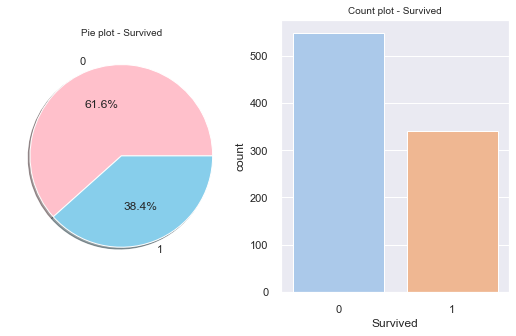

In [72]:
f, ax=plt.subplots(1, 2, figsize=(9,5))

train['Survived'].value_counts().plot.pie(explode=[0,0.0],autopct='%1.1f%%', 
ax=ax[0], shadow='True', colors=['pink', 'skyblue'])
ax[0].set_title('Pie plot - Survived', fontsize=10)
ax[0].set_ylabel('')

sns.set(font_scale=1)
sns.set_palette('pastel')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived', fontsize=10)

plt.show()